# Data Project - Gross unemployment

For this project we use DST API

1. Open the Anaconda prompt.
2. Run the command 'pip install git+https://github.com/alemartinello/dstapi' in the prompt.
3. For a more detailed guide on using the DST API, please refer to https://github.com/alemartinello/dstapi.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi

In [26]:
gross_unemployment_dst = DstApi('AUS07')

summary_gross_unemployment = gross_unemployment_dst.tablesummary(language='en')

display(summary_gross_unemployment)

Table AUS07: Unemployed persons (seasonally adjusted) by benefits, sex and age, seasonal adjustment and actual figures and time
Last update: 2023-03-30T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,YD,15,TOT,Gross unemployment,O60,60 years and more,False
1,SAESONFAK,4,9,Seasonally adjusted figures in percent of the ...,24,Enumerated actual figures,False
2,Tid,194,2007M01,2007M01,2023M02,2023M02,True


In [55]:
# Defining and sorting parameters
par_gross_unemployment = {
    'table': 'AUS07',
    'format': 'BULK',
    'lang': 'en',
    'variables': [
        {'code': 'YD', 'values': ['TOT', 'MEN','KVR']}, #TOT = Gross Employment, MEN = Men, KVR = Woman.
        {'code': 'SAESONFAK', 'values': ['9']}, #9 = Seasonally adjusted figures in percent of the labour force
        {'code': 'Tid', 'values': ['>2007M01<=2023M02']}
    ]
}

# Fetching data based on the previous code block parameters (Fetching from AUS07)
gross_unemployment = gross_unemployment_dst.get_data(params=par_gross_unemployment)

# Sort the DataFrame by date
gross_unemployment = gross_unemployment.sort_values('TID')


# Renaming the columns
gross_unemployment.rename(columns=
                          {'YD':'TOTAL GROSS EMPLOYMENT AND SEX',
                          'SAESONFAK':'SEASONAL ADJUSTMENT',
                          'TID':'YEAR AND MONTH',
                          'INDHOLD':'PCT'},
                          inplace=True
                          )

# Convert pct. into flots
gross_unemployment['PCT'] = pd.to_numeric(gross_unemployment['PCT'])

# Converting YEAR AND MONTH column to datetime format
gross_unemployment['YEAR AND MONTH'] = pd.to_datetime(gross_unemployment['YEAR AND MONTH'], format='%YM%m')

# Displaying the first 6 rows of our fetched data from AUS07. We also an option to print out the last 6 rows of data
gross_unemployment.head(6)

display(gross_unemployment.head(6), gross_unemployment.tail(6))

,TOTAL GROSS EMPLOYMENT AND SEX,SEASONAL ADJUSTMENT,YEAR AND MONTH,PCT
79,Men,Seasonally adjusted figures in percent of the ...,2007-02-01,3.2
78,Women,Seasonally adjusted figures in percent of the ...,2007-02-01,5.1
80,Gross unemployment,Seasonally adjusted figures in percent of the ...,2007-02-01,4.1
160,Gross unemployment,Seasonally adjusted figures in percent of the ...,2007-03-01,3.9
159,Men,Seasonally adjusted figures in percent of the ...,2007-03-01,3.1
158,Women,Seasonally adjusted figures in percent of the ...,2007-03-01,4.9


,TOTAL GROSS EMPLOYMENT AND SEX,SEASONAL ADJUSTMENT,YEAR AND MONTH,PCT
513,Gross unemployment,Seasonally adjusted figures in percent of the ...,2023-01-01,2.8
527,Men,Seasonally adjusted figures in percent of the ...,2023-01-01,2.5
526,Women,Seasonally adjusted figures in percent of the ...,2023-01-01,3.0
218,Men,Seasonally adjusted figures in percent of the ...,2023-02-01,2.5
217,Women,Seasonally adjusted figures in percent of the ...,2023-02-01,3.0
216,Gross unemployment,Seasonally adjusted figures in percent of the ...,2023-02-01,2.8


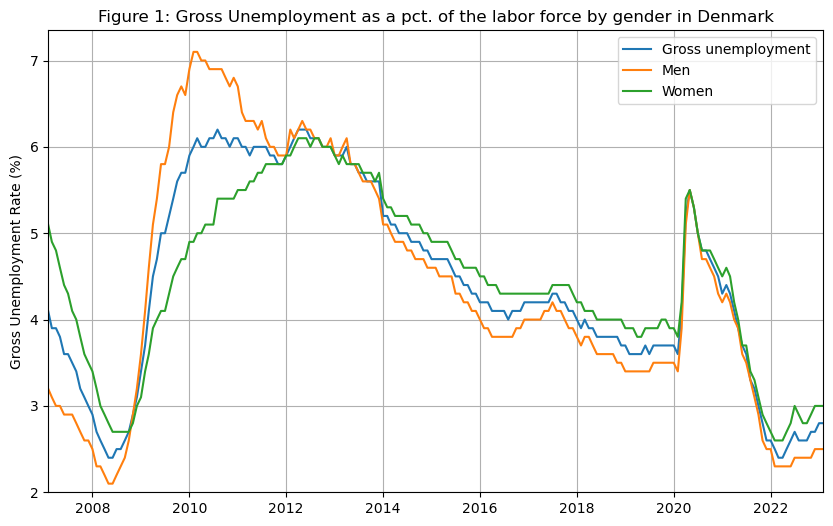

In [61]:
# Set the figure size
plt.figure(figsize=(10,6))

# Group the data by the 'TOTAL GROSS EMPLOYMENT AND SEX' column
grouped = gross_unemployment.groupby('TOTAL GROSS EMPLOYMENT AND SEX')

# Loop through the grouped data and plot each group
for name, group in grouped:
    plt.plot(group['YEAR AND MONTH'], group['PCT'], label=name)

# Adding label and title
plt.ylabel('Gross Unemployment Rate (%)')
plt.title('Figure 1: Gross Unemployment as a pct. of the labor force by gender in Denmark')

# Starting y-axis from 2 pct.
plt.ylim(2,None)

# Setting the x-axis limits to show the earliest and latest dates available in the fetched data
plt.xlim(pd.to_datetime('2007-02-01'), pd.to_datetime('2023-02-01'))

# Show the legends
plt.legend()

# Adding gridlines
plt.grid()

# Show the plot
plt.show()
